# Least Squares Curve Fitting Using SciPy

## Objective
To study parameter estimation using the least squares principle
and implement curve fitting methods using SciPy.

The focus is on:
- Linear least squares
- Polynomial curve fitting
- Nonlinear curve fitting using SciPy
- Residual analysis and interpretation


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

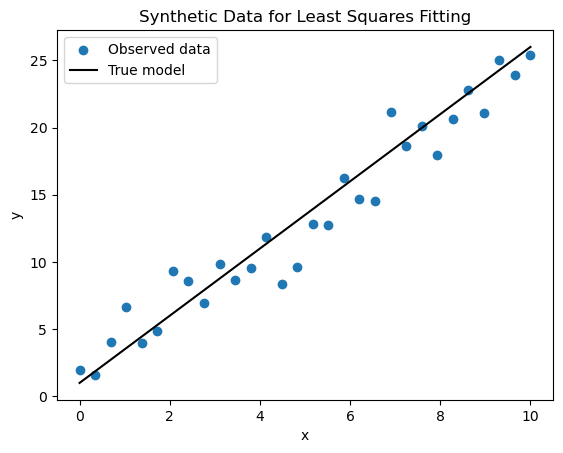

In [2]:
np.random.seed(42)

x = np.linspace(0, 10, 30)
y_true = 2.5 * x + 1.0
noise = np.random.normal(0, 2.0, size=len(x))
y = y_true + noise

plt.scatter(x, y, label="Observed data")
plt.plot(x, y_true, label="True model", color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Synthetic Data for Least Squares Fitting")
plt.show()

In [3]:
A = np.vstack([x, np.ones(len(x))]).T

coeffs, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
a_hat, b_hat = coeffs

print("Estimated parameters:")
print("a =", a_hat)
print("b =", b_hat)

Estimated parameters:
a = 2.2961898978890085
b = 1.642756718852883


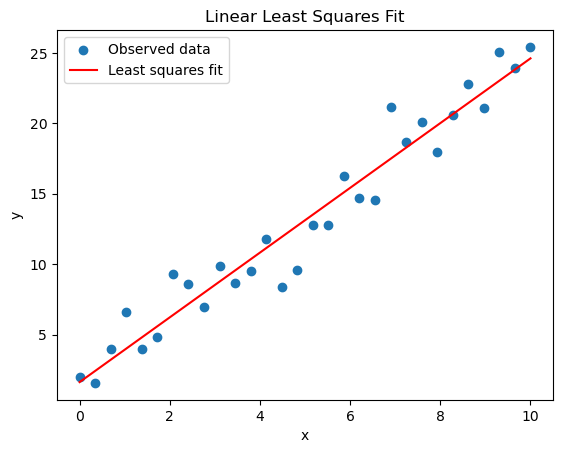

In [4]:
y_fit = a_hat * x + b_hat

plt.scatter(x, y, label="Observed data")
plt.plot(x, y_fit, label="Least squares fit", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Least Squares Fit")
plt.show()

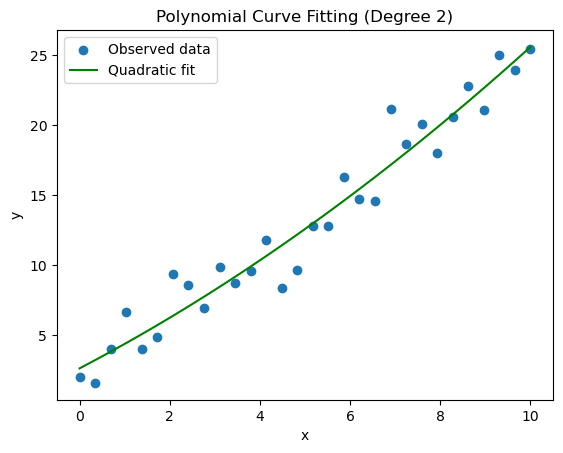

In [5]:
coeffs_poly = np.polyfit(x, y, deg=2)
y_poly = np.polyval(coeffs_poly, x)

plt.scatter(x, y, label="Observed data")
plt.plot(x, y_poly, label="Quadratic fit", color="green")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Curve Fitting (Degree 2)")
plt.show()

Estimated parameters (exponential model):
a = 4.978746242494961
b = 0.17035375957558002


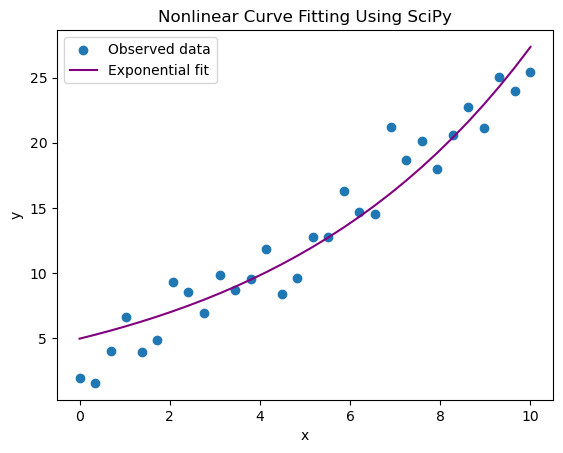

In [6]:
def exponential_model(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exponential_model, x, y, maxfev=5000)
a_exp, b_exp = params

print("Estimated parameters (exponential model):")
print("a =", a_exp)
print("b =", b_exp)

y_exp = exponential_model(x, a_exp, b_exp)

plt.scatter(x, y, label="Observed data")
plt.plot(x, y_exp, label="Exponential fit", color="purple")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Nonlinear Curve Fitting Using SciPy")
plt.show()

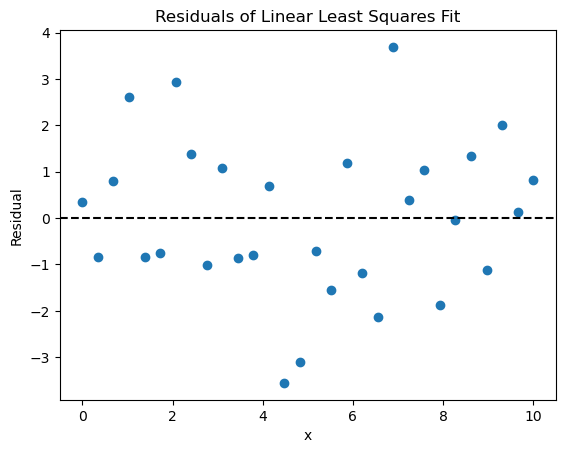

In [7]:
residuals_linear = y - y_fit

plt.scatter(x, residuals_linear)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("x")
plt.ylabel("Residual")
plt.title("Residuals of Linear Least Squares Fit")
plt.show()

## Interpretation

The least squares method estimates model parameters by minimizing
the sum of squared residuals between observed and fitted values.

Linear and polynomial models capture the overall trend in the data,
while nonlinear fitting using SciPy allows flexible model forms.
Residual analysis helps assess goodness of fit and model adequacy.